In [1]:
from sympy import *

In [2]:
s=symbols("s", positive=True)
t=symbols("t", real=True)

In [3]:
H=1/s

In [4]:
h=inverse_laplace_transform(H,s,t)
h

Heaviside(t)

In [5]:
G=1/s

In [6]:
F=G*H
f=inverse_laplace_transform(F,s,t)
f

t*Heaviside(t)

In [7]:
H=1/(s+1)
F=G*H
f=inverse_laplace_transform(F,s,t).simplify().expand()
f

Heaviside(t) - exp(-t)*Heaviside(t)

In [8]:
H=1.0/(s+1.0)
F=G*H
f=inverse_laplace_transform(F,s,t).simplify().expand()
f

1.0*Heaviside(t) - 1.0*exp(-t)*Heaviside(t)

In [9]:
H=1000/(s+10)/(s+100)
F=G*H
f=inverse_laplace_transform(F,s,t).simplify().expand()
f

Heaviside(t) - 10*exp(-10*t)*Heaviside(t)/9 + exp(-100*t)*Heaviside(t)/9

In [10]:
import sympy as sympy
#wo^2=2.34153145345 chosen to break the inverse laplace transform.
H=(s**2+2.34153145345)/(s**2+s+2.34153145345)
F=G*H
#Use Apart first.  Apart can turn rationals into floats
F=apart(G*H,s)
# We ahve to turn the floats into rationals or the inverse laplace might not work.
for i in F.atoms(sympy.Float):
        r = sympy.Rational(i).limit_denominator(1000)
        F = F.subs(i, r)
f=inverse_laplace_transform(F,s,t).simplify().expand()
f

Heaviside(t) - 2*sqrt(280173)*exp(-t/2)*sin(sqrt(280173)*t/366)*Heaviside(t)/1531

In [11]:
f=sympy.N(f)
f

Heaviside(t) - 0.691461406407671*exp(-t/2)*sin(sqrt(280173)*t/366)*Heaviside(t)

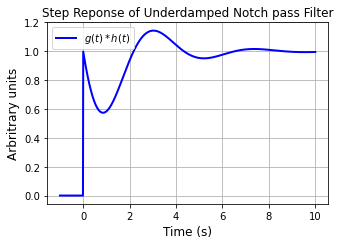

In [12]:
import numpy as np
import matplotlib.pyplot as plt
N=1000
time=np.linspace(-1,10,N)
flam = lambdify(t, f, "numpy")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.subplots_adjust(left=0.25, bottom=0.25)
legend='$g(t)*h(t) $'
[line] = ax.plot(time, flam(time), linewidth=2, color='blue',label=legend)
ax.set_xlabel('Time (s)',fontsize=12)
ax.set_ylabel('Arbritrary units',fontsize=12) 
ax.legend()
ax.set_title('Step Reponse of Underdamped Notch pass Filter')
ax.grid()
